In [ ]:
#输入图片路径，搭建CNN模型
import numpy as np
np.random.seed(1113)  # for reproducibility
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam,SGD
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
import cv2
import os
imagelist = os.listdir('./img/')
imagelist_neg = os.listdir('./img_neg/')
imagelist_neg_new = os.listdir('./img_neg_new/')
imagelist_niupixian=os.listdir('./img_niupixian/')
BATCH_SIZE = 128
BATCH_INDEX = 0


def read_img(path,content,flag,data,label):
    i=0
    for img in content:
        try:
            i+=1
            I = cv2.imread(path+str(img))
            if I.shape!=(130,130,3):
                print(i)
            data.append(I)
            label.append([flag])
        except:
            continue
    return data,label
data,label=read_img('./img/',imagelist,1,[],[])
data,label=read_img('./img_neg/',imagelist_neg,0,data,label)
data,label=read_img('./img_neg_new/',imagelist_neg_new,0,data,label)
data,label=read_img('./img_niupixian/',imagelist_niupixian,0,data,label)
print('The whole data number is {}'.format(len(data)))

data=np.array(data)
label=np.array(label)
x_train, x_test, y_train, y_test = train_test_split(
    data, label, test_size=0.1 ,random_state=0)
x_test_compare=x_test
x_train=x_train.reshape(-1,3,130,130)/255.
x_test=x_test.reshape(-1,3,130,130)/255.
print('Data process done')
model = Sequential()
# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None,3,130,130),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
))
model.add(Activation('relu'))

# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
# Fully connected layer 2 to shape (10) for 2 classes
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Another way to define your optimizer
adam = Adam(lr=1e-4)
sgd = SGD(lr=0.05, momentum=0.9, decay=1e-6, nesterov=True)
# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])
#print(len(model.get_weights()),len(model.get_weights()[-1]))
print(model.summary())

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
model.fit(x_train, y_train, epochs=200, validation_data=(x_test,y_test), batch_size=BATCH_SIZE, callbacks=[early_stopping])
model.save('CNN_model4')
print(model.predict(x_test))
'''
max=0
for step in range(5001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = x_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    cost = model.train_on_batch(X_batch, Y_batch)
    
    
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= x_train.shape[0] else BATCH_INDEX

    if step % 100 == 0:
        cost, accuracy = model.evaluate(x_test, y_test, batch_size=y_test.shape[0], verbose=False)
        cost1, accuracy1 = model.evaluate(x_train, y_train, batch_size=y_test.shape[0], verbose=False)
        print('test cost: ', cost, 'test accuracy: ', accuracy)
        if accuracy>max:
            max=accuracy
        print('train cost: ', cost1, 'train accuracy: ', accuracy1)
        #print(len(model.get_weights()),len(model.get_weights()[1]))
print(max)'''

Using TensorFlow backend.


The whole data number is 98948


Recall is 0.0,ACC is 0.584192439862543


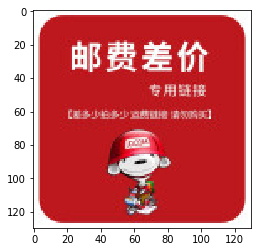

0


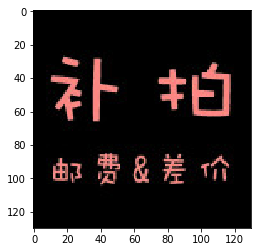

0


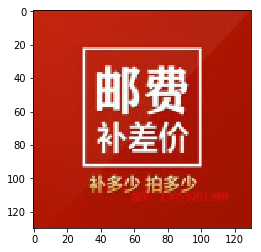

0


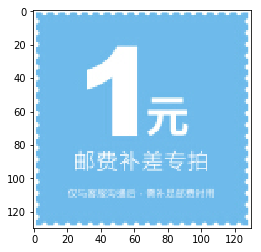

0


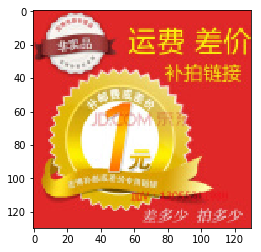

0


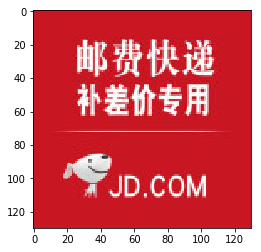

0


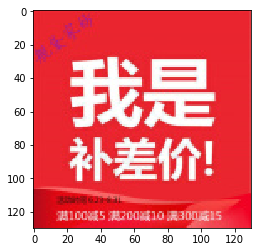

0


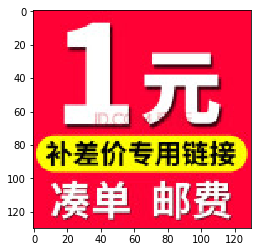

0


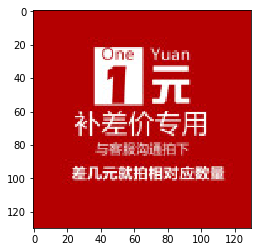

0


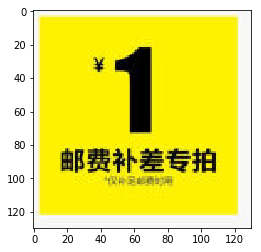

0


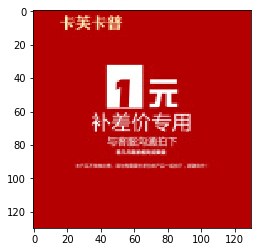

0


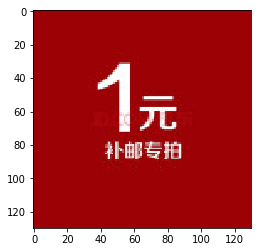

0


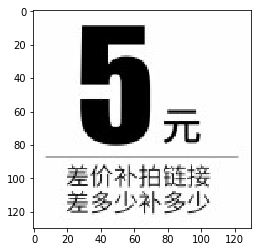

0


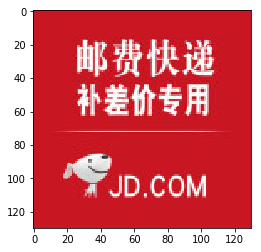

0


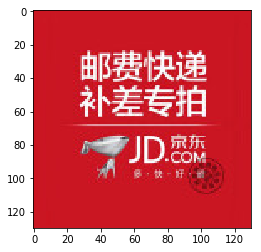

0


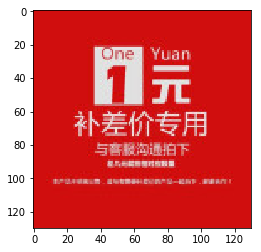

0


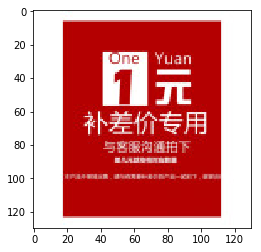

0


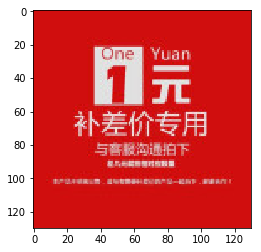

0


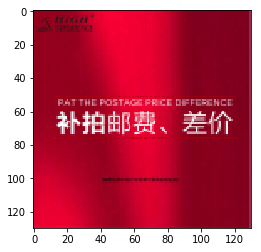

0


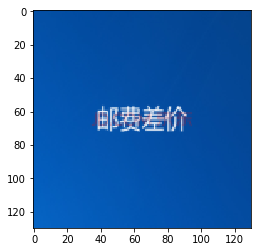

0


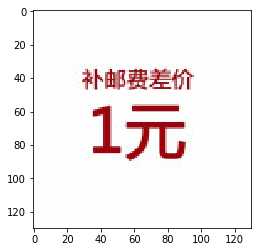

0


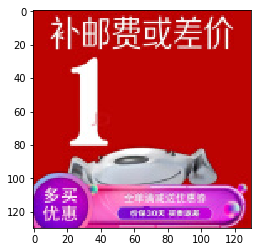

0


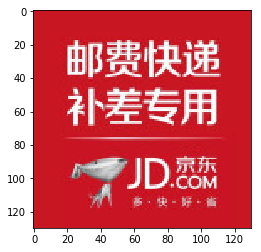

0


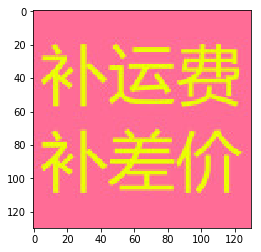

0


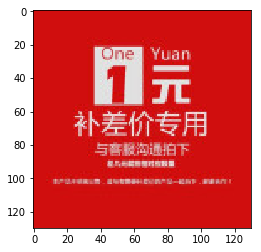

0


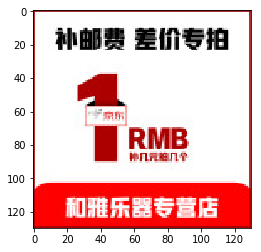

0


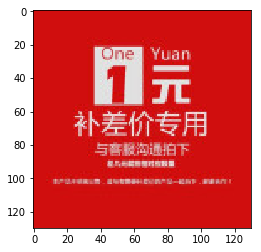

0


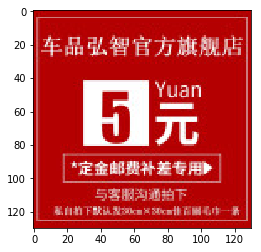

0


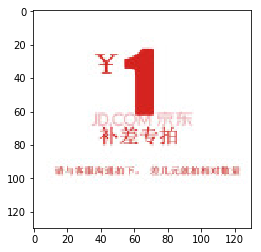

0


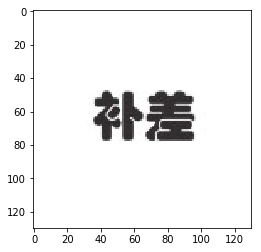

0


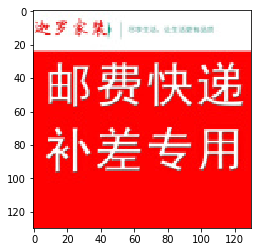

0


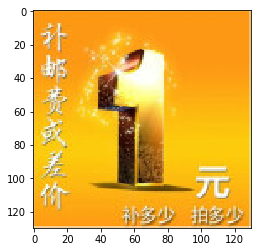

0


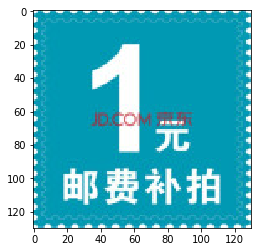

0


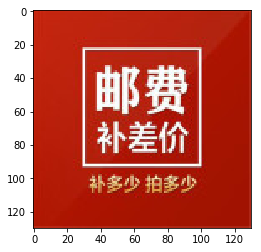

0


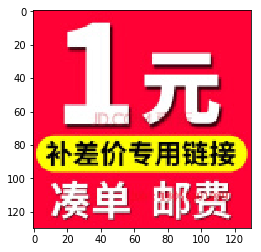

0


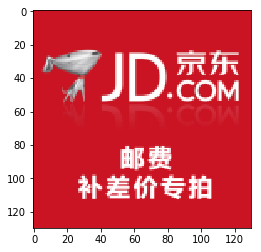

0


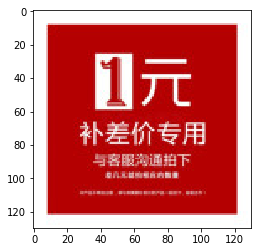

0


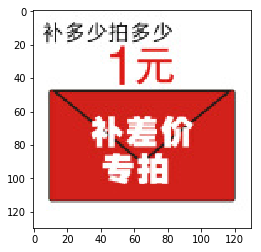

0


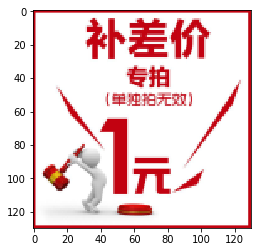

0


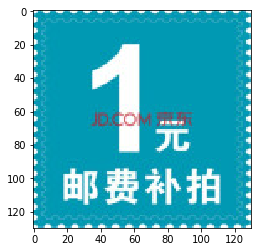

0


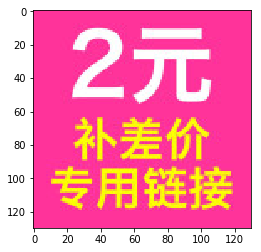

0


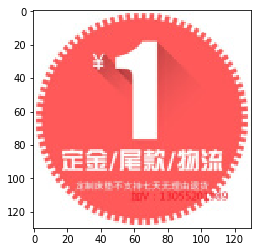

0


KeyboardInterrupt: 

In [5]:
import pylab as plt
import cv2
import numpy as np
from keras.models import load_model

np.random.seed(1113)  # for reproducibility
from sklearn import cross_validation
import cv2
import os
imagelist = os.listdir('./img/')
imagelist_neg = os.listdir('./img_neg/')
'''data=[]
label=[]
i=0
j=0
for img in imagelist:
    try:
        i+=1
        I = cv2.imread('./img/'+str(img))
        if I.shape!=(130,130,3):
            print(i)
        data.append(I)
        label.append([1])
    except:
        continue
for img_neg in imagelist_neg:
    try:
        j+=1
        I = cv2.imread('./img_neg/'+str(img_neg))
        if I.shape!=(130,130,3):
            print(j)
        data.append(I)
        label.append([0])
    except:
        continue
data=np.array(data)
label=np.array(label)
x_train, x_test,y_train,  y_test = cross_validation.train_test_split(
    data, label, test_size=0.05 ,random_state=0)
x_test_compare=x_test
x_train=x_train.reshape(-1,3,130,130)/255.
x_test=x_test.reshape(-1,3,130,130)/255.'''
model = load_model('CNN_model2')
recall=0
acc=0
len_recall=0
out=[]
y_pre=model.predict(x_test)
id=0
for item in y_pre:
    if y_test[id]==1:
        len_recall+=1
        if item[0]>0.5:
            recall+=1        
    if item[0]>0.5:
        out.append(1)
        if y_test[id]==1:
            acc+=1
    else:
        out.append(0)
        if y_test[id]==0:
            acc+=1
    id+=1
print('Recall is {},ACC is {}'.format(recall/len_recall,acc/len(y_test)))
for i in range(len(y_test)):
    I=x_test_compare[i]
    plt.imshow(I[..., -1::-1])    # 因为opencv读取进来的是bgr顺序呢的，而imshow需要的是rgb顺序，因此需要先反过来
    plt.show()
    print(out[i])

In [2]:
import pylab as plt
import cv2
import numpy as np
from keras.models import load_model

np.random.seed(1113)  # for reproducibility
import cv2
import os
data=[]
label=[]
def double(content,path): 
    j=0
    for img in content:
        try:
            j+=1
            I = cv2.imread(path+str(img))
            if I.shape!=(130,130,3):
                print(j)
            data.append(I)
            label.append([0])
        except:
            continue
    return data,label
def single(path):
    I = cv2.imread(path)
    data.append(I)
    label.append([0])
    return data,label
#单张预测
data,lable=single('./baitu.jpg')

name='./img_suipingxian/'
#多张预测
imagelist_niupixian = os.listdir(name)
#data,lable=double(imagelist_niupixian,name)

x_test=np.array(data)
y_test=np.array(label)
x_test_compare=x_test
x_test=x_test.reshape(-1,3,130,130)/255.
model = load_model('CNN_model')
recall=0
acc=0
len_recall=0
out=[]
y_pre=model.predict(x_test)
print(y_pre)
id=0
for item in y_pre:
    if item[0]>0.5:
        out.append(1)
        if y_test[id]==1:
            acc+=1
    else:
        out.append(0)
        if y_test[id]==0:
            acc+=1
    id+=1
print('ACC is {}'.format(acc/len(y_test)))
for i in range(len(y_test)):
    I=x_test_compare[i]
    plt.imshow(I[..., -1::-1])    # 因为opencv读取进来的是bgr顺序呢的，而imshow需要的是rgb顺序，因此需要先反过来
    plt.show()
    print(out[i])

ValueError: cannot reshape array of size 1 into shape (3,130,130)